In [1]:
import pandas as pd
import numpy as np 

In [2]:
house_df=pd.read_csv("/Users/amelchristy/Desktop/Python_Project/Real_Estate_Lehigh/zip_code_market_tracker.tsv000 (1)",delimiter='\t')



In [7]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame, with all columns
print(house_df.head())

# Reset the option back to default if needed
pd.reset_option('display.max_columns')

  period_begin  period_end  period_duration region_type  region_type_id  \
0   2018-12-01  2019-02-28               90    zip code               2   
1   2016-04-01  2016-06-30               90    zip code               2   
2   2019-10-01  2019-12-31               90    zip code               2   
3   2022-06-01  2022-08-31               90    zip code               2   
4   2019-09-01  2019-11-30               90    zip code               2   

   table_id is_seasonally_adjusted           region  city         state  \
0     24614                      f  Zip Code: 57106   NaN  South Dakota   
1      5033                      f  Zip Code: 14086   NaN      New York   
2     17977                      f  Zip Code: 43044   NaN          Ohio   
3     16419                      f  Zip Code: 38611   NaN   Mississippi   
4     20397                      f  Zip Code: 48034   NaN      Michigan   

  state_code              property_type  property_type_id  median_sale_price  \
0         SD      

In [8]:
import numpy as np 
np.mean(house_df['median_ppsf'])

592.2889481679973

In [9]:
top_20_median_ppsf = house_df['median_ppsf'].nsmallest(100)
print(top_20_median_ppsf)


1539510    0.000165
1894747    0.000165
7344892    0.000165
365019     0.000199
665131     0.000219
             ...   
6814606    0.003466
3573630    0.003546
1839316    0.004145
2532070    0.004145
4169125    0.004145
Name: median_ppsf, Length: 100, dtype: float64


In [10]:
#not all median ppsf makes sense so im filtering it based on the lowest ppsf in the us and the highest in the us
filtered_house_df = house_df[(house_df['median_ppsf'] >= 5) & (house_df['median_ppsf'] <= 3000)]

In [11]:
# Convert 'period_begin' to datetime format
filtered_house_df['period_begin'] = pd.to_datetime(filtered_house_df['period_begin'])

# Filter the DataFrame for the specified years 2019-2023
house_filtered = filtered_house_df[(filtered_house_df['period_begin'].dt.year >= 2019) & (filtered_house_df['period_begin'].dt.year <= 2023)]


/var/folders/j0/ysx0mq61491_qvvdmdxv8x_w0000gn/T/ipykernel_17116/2103337978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house_df['period_begin'] = pd.to_datetime(filtered_house_df['period_begin'])


/var/folders/j0/ysx0mq61491_qvvdmdxv8x_w0000gn/T/ipykernel_17116/3940839425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_house_df['period_begin'] = pd.to_datetime(filtered_house_df['period_begin'])


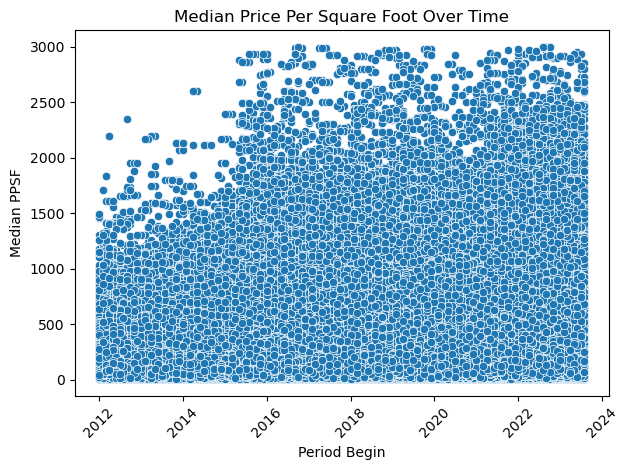

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
#visualize over the year from 2012-2023
# Convert 'period_begin' to datetime
filtered_house_df['period_begin'] = pd.to_datetime(filtered_house_df['period_begin'])

# Create a scatter plot for 'median_ppsf' over time
sns.scatterplot(data=filtered_house_df, x='period_begin', y='median_ppsf')
plt.title('Median Price Per Square Foot Over Time')
plt.xlabel('Period Begin')
plt.ylabel('Median PPSF')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()


In [6]:
#import pandas as pd

# Assuming your DataFrame is named 'df'
# Convert 'period_begin' to datetime format
#house_df['period_begin'] = pd.to_datetime(house_df['period_begin'])

# Extract the year and find unique years
#unique_years = house_df['period_begin'].dt.year.unique()
#print("Unique years in the dataset:", unique_years)


Unique years in the dataset: [2018 2016 2019 2022 2020 2017 2021 2023 2013 2015 2014 2012]


In [17]:
house_filtered.keys()

Index(['period_begin', 'period_end', 'period_duration', 'region_type',
       'region_type_id', 'table_id', 'is_seasonally_adjusted', 'region',
       'city', 'state', 'state_code', 'property_type', 'property_type_id',
       'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
       'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
       'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'median_list_ppsf',
       'median_list_ppsf_mom', 'median_list_ppsf_yoy', 'homes_sold',
       'homes_sold_mom', 'homes_sold_yoy', 'pending_sales',
       'pending_sales_mom', 'pending_sales_yoy', 'new_listings',
       'new_listings_mom', 'new_listings_yoy', 'inventory', 'inventory_mom',
       'inventory_yoy', 'months_of_supply', 'months_of_supply_mom',
       'months_of_supply_yoy', 'median_dom', 'median_dom_mom',
       'median_dom_yoy', 'avg_sale_to_list', 'avg_sale_to_list_mom',
       'avg_sale_to_list_yoy', 'sold_above_list', 'sold_above_list_mom',
 

In [18]:
#house_df.shape
house_filtered.shape

(3267410, 59)

In [19]:
pd.set_option('display.max_columns', 58)

# Show the first 5 rows of the DataFrame with all columns
print(house_filtered.tail())

        period_begin  period_end  period_duration region_type  region_type_id  \
7561503   2021-03-01  2021-05-31               90    zip code               2   
7561504   2020-10-01  2020-12-31               90    zip code               2   
7561507   2019-05-01  2019-07-31               90    zip code               2   
7561512   2020-12-01  2021-02-28               90    zip code               2   
7561515   2020-02-01  2020-04-30               90    zip code               2   

         table_id is_seasonally_adjusted           region  city  \
7561503     25612                      f  Zip Code: 59701   NaN   
7561504     34835                      f  Zip Code: 80428   NaN   
7561507      3512                      f  Zip Code: 10596   NaN   
7561512      1053                      f  Zip Code: 03235   NaN   
7561515      7202                      f  Zip Code: 18762   NaN   

                 state state_code              property_type  \
7561503        Montana         MT            A

In [20]:
#remove zipcode string under region column 
house_filtered['zipcode'] = house_filtered['region'].str.replace(r'Zip Code: ', '', regex=True)


# Display the DataFrame to verify the column is cleaned
house_filtered

/var/folders/j0/ysx0mq61491_qvvdmdxv8x_w0000gn/T/ipykernel_17116/3718572966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_filtered['zipcode'] = house_filtered['region'].str.replace(r'Zip Code: ', '', regex=True)


,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,region,city,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,...,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode
2,2019-10-01,2019-12-31,90,zip code,2,17977,f,Zip Code: 43044,NaN,Ohio,OH,Single Family Residential,6,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,94.455316,0.000000,-0.044860,10.0,0.111111,0.000000,5.0,...,4.000000,11.0,0.000000,0.100000,6.0,-0.571429,-0.647059,NaN,NaN,NaN,66.0,-7.0,-2.5,0.990772,0.020588,0.003037,0.200000,-0.022222,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Urbana, OH",46500,2023-11-26 14:23:37,43044
3,2022-06-01,2022-08-31,90,zip code,2,16419,f,Zip Code: 38611,NaN,Mississippi,MS,All Residential,-1,340000.0,0.000000,0.357285,349250.0,-0.168254,0.042693,157.297576,-0.006996,0.248393,162.105758,-0.007313,0.176632,43.0,-0.044444,0.228571,17.0,...,0.700000,50.0,-0.074074,0.562500,28.0,0.037037,-0.282051,NaN,NaN,NaN,6.5,1.0,-52.5,1.003796,0.003849,0.012217,0.395349,-0.093540,0.081063,NaN,NaN,NaN,0.588235,0.280543,0.588235,"Memphis, TN",32820,2023-11-26 14:23:37,38611
4,2019-09-01,2019-11-30,90,zip code,2,20397,f,Zip Code: 48034,NaN,Michigan,MI,Single Family Residential,6,231650.0,-0.034389,-0.172679,299900.0,-0.000167,0.100752,94.444444,-0.029666,-0.089638,119.750000,0.024105,0.223819,11.0,-0.153846,0.100000,2.0,...,-0.333333,13.0,0.083333,0.083333,9.0,0.500000,-0.100000,NaN,NaN,NaN,28.0,4.0,10.0,0.953366,-0.011263,-0.045505,0.181818,0.027972,-0.118182,NaN,NaN,NaN,0.000000,0.000000,-0.333333,"Warren, MI",47664,2023-11-26 14:23:37,48034
5,2020-04-01,2020-06-30,90,zip code,2,35959,f,Zip Code: 84144,NaN,Utah,UT,All Residential,-1,433750.0,-0.612723,-0.014205,469000.0,-0.294737,-0.454016,460.945802,-0.242304,-0.126298,529.776299,0.019467,-0.037606,1.0,-0.500000,-0.857143,2.0,...,1.000000,8.0,0.142857,3.000000,13.0,0.083333,0.625000,NaN,NaN,NaN,2.0,-685.5,-66.0,0.966036,-0.006435,0.004818,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.500000,-0.500000,0.500000,"Salt Lake City, UT",41620,2023-11-26 14:23:37,84144
6,2019-04-01,2019-06-30,90,zip code,2,27973,f,Zip Code: 64507,NaN,Missouri,MO,Single Family Residential,6,88500.0,-0.016667,-0.096939,92500.0,-0.002157,0.028921,66.666667,-0.000970,-0.122424,67.601246,-0.061091,-0.104655,49.0,0.065217,0.166667,12.0,...,0.200000,69.0,0.232143,-0.080000,79.0,0.179104,0.025974,NaN,NaN,NaN,64.0,2.5,-24.0,0.947182,-0.002340,-0.014909,0.102041,0.036823,0.006803,NaN,NaN,NaN,0.083333,0.011905,0.083333,"St. Joseph, MO",41140,2023-11-26 14:23:37,64507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7561503,2021-03-01,2021-05-31,90,zip code,2,25612,f,Zip Code: 59701,NaN,Montana,MT,All Residential,-1,185000.0,0.060172,0.042254,220000.0,0.000000,0.050370,119.814020,0.057688,0.208692,123.750000,0.044182,0.118333,182.0,0.096386,0.716981,46.0,...,1.300000,204.0,0.283019,0.619048,156.0,0.130435,-0.071429,NaN,NaN,NaN,62.5,-15.5,-11.0,NaN,NaN,NaN,0.000000,0.000000,-0.009434,NaN,NaN,NaN,0.000000,-0.031250,0.000000,"Butte, MT",155

In [21]:
#drop region
house_filtered= house_filtered.drop(columns=['region','city','is_seasonally_adjusted','last_updated'])

In [44]:
#house_df.keys
house_filtered.shape

(3267410, 55)

In [14]:
#pip install xlrd

In [22]:
# read by default 1st sheet of an excel file
population_df = pd.read_csv("/Users/amelchristy/Desktop/Python_Project/Real_Estate_Lehigh/uscities.csv")

/var/folders/j0/ysx0mq61491_qvvdmdxv8x_w0000gn/T/ipykernel_17116/3465129569.py:2: DtypeWarning: Columns (2,7) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv("/Users/amelchristy/Desktop/Python_Project/Real_Estate_Lehigh/uscities.csv")


In [23]:
#remove the space on the zipcode 
population_df.head()

,city,city_ascii,city_alt,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,population_proper,density,source,military,incorporated,cdp,timezone,ranking,zips,id,age_median,male,female,married,family_size,income_household_median,income_household_six_figure,home_ownership,home_value,rent_median,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple
0,New York,New York,NaN,NY,New York,36081,Queens,36081|36047|36085|36005|36061,Queens|Kings|Richmond|Bronx|New York,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1
1,Los Angeles,Los Angeles,NaN,CA,California,6037,Los Angeles,06037,Los Angeles,34.1141,-118.4068,11922389.0,3902440.0,3202.3,shape,False,True,False,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491,36.2,49.8,50.2,38.9,3.55,69778.0,35.6,36.9,705680.0,1641.0,36.2,66.7,7.6,44.9,8.6,11.7,0.9,0.2,24.0,9.8
2,Chicago,Chicago,NaN,IL,Illinois,17031,Cook,17031|17043,Cook|DuPage,41.8375,-87.6866,8497759.0,2742119.0,4648.7,shape,False,True,False,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494,35.1,48.8,51.2,35.5,3.36,65781.0,33.3,45.6,277714.0,1209.0,41.7,67.3,8.4,45.3,29.2,6.8,0.5,0.0,10.7,7.4
3,Miami,Miami,NaN,FL,Florida,12086,Miami-Dade,12086,Miami-Dade,25.7840,-80.2101,6080145.0,440807.0,4728.2,shape,False,True,False,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149,39.9,50.4,49.6,37.3,3.17,47860.0,23.1,30.0,368439.0,1361.0,33.0,64.6,5.6,55.0,15.2,1.4,0.3,0.0,5.2,22.9
4,Houston,Houston,NaN,TX,Texas,48201,Harris,48201|48157|48339,Harris|Fort Bend|Montgomery,29.7860,-95.3885,5970127.0,2293288.0,1382.2,shape,False,True,False,America/Chicago,1,77069 77068 77061 77060 77063 77062 77065 7706...,1840020925,33.7,49.8,50.2,41.2,3.36,56019.0,27.0,42.5,205913.0,1136.0,34.8,66.9,6.5,46.8,22.6,6.8,0.5,0.1,12.5,10.8


In [24]:
# split the zip 
pop_df= population_df.assign(zips=population_df['zips'].str.split()).explode('zips')

pop_df.reset_index(drop=True, inplace=True)


pop_df.shape

(131470, 42)

In [25]:
pop_df.keys()


Index(['city', 'city_ascii', 'city_alt', 'state_id', 'state_name',
       'county_fips', 'county_name', 'county_fips_all', 'county_name_all',
       'lat', 'lng', 'population', 'population_proper', 'density', 'source',
       'military', 'incorporated', 'cdp', 'timezone', 'ranking', 'zips', 'id',
       'age_median', 'male', 'female', 'married', 'family_size',
       'income_household_median', 'income_household_six_figure',
       'home_ownership', 'home_value', 'rent_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple'],
      dtype='object')

In [26]:
#pop_df= pop_df.drop(columns='city_ascii')
pop_df = pop_df.drop(columns=['city_ascii', 'city_alt','county_fips_all','county_name','county_name_all'])


In [27]:
pop_df.shape


(131470, 37)

In [28]:
#wanna see shape for both
print(pop_df.shape)
print(house_filtered.shape)

(131470, 37)
(3267410, 55)


In [29]:
pop_df.keys()

Index(['city', 'state_id', 'state_name', 'county_fips', 'lat', 'lng',
       'population', 'population_proper', 'density', 'source', 'military',
       'incorporated', 'cdp', 'timezone', 'ranking', 'zips', 'id',
       'age_median', 'male', 'female', 'married', 'family_size',
       'income_household_median', 'income_household_six_figure',
       'home_ownership', 'home_value', 'rent_median',
       'education_college_or_above', 'labor_force_participation',
       'unemployment_rate', 'race_white', 'race_black', 'race_asian',
       'race_native', 'race_pacific', 'race_other', 'race_multiple'],
      dtype='object')

In [30]:
# Convert the unique values in both columns to sets
unique_zips_population = set(pop_df['zips'].unique())
unique_zips_house = set(house_filtered['zipcode'].unique())

# Find the intersection of both sets to see which zip codes are present in both dataframes
common_zips = unique_zips_population.intersection(unique_zips_house)

# Print out the common zip codes
print(common_zips)

# Check the length of the common zip codes set to see how many matches there are
print(f"Number of matching zip codes: {len(common_zips)}")


{'65048', '43070', '42259', '93305', '02833', '32805', '60440', '15059', '71920', '46381', '89170', '27604', '94901', '93641', '53227', '08758', '16333', '03038', '98065', '32035', '10528', '02746', '65232', '53147', '79930', '29067', '95357', '45658', '64459', '16881', '55943', '27102', '27569', '27519', '61238', '93460', '65068', '43050', '57374', '95616', '85145', '14526', '02542', '18201', '78202', '63447', '11779', '61070', '28743', '74471', '65720', '72740', '75567', '74422', '06794', '43522', '30103', '59602', '03062', '52626', '85337', '30663', '44841', '08090', '75672', '17777', '10930', '07649', '90248', '03291', '37062', '95240', '60565', '61356', '80427', '55716', '20896', '68602', '77345', '28256', '97115', '19090', '66073', '85373', '56253', '68317', '56543', '94574', '29577', '97412', '55354', '48127', '45325', '29329', '95071', '65274', '73639', '49303', '12921', '30087', '78563', '31796', '14607', '57035', '30268', '16693', '78384', '29405', '04017', '07724', '28736', 

In [31]:
df=pd.DataFrame()
df['pop']=pop_df['zips']
df['house']=house_filtered['zipcode']

df['pop'].value_counts()

85634    91
78582    77
00820    65
00840    53
42633    48
         ..
60072     1
37669     1
68038     1
37662     1
95664     1
Name: pop, Length: 39187, dtype: int64

In [32]:
df['house'].value_counts()

80220    41
85040    38
19348    38
32707    37
91950    37
         ..
14870     1
13104     1
37211     1
35963     1
12577     1
Name: house, Length: 8568, dtype: int64

In [39]:
##I wanna check for duplicates zipcode
# Check for duplicate 'zips' in pop_df
duplicate_zips = pop_df['zips'].duplicated().sum()
print(f"Number of duplicate 'zips' in pop_df: {duplicate_zips}")

# Creating a DataFrame with only duplicated 'zips'
duplicated_zips_df = pop_df[pop_df['zips'].duplicated(keep=False)]

# Display the DataFrame
duplicated_zips_df.head(50)
duplicated_zips_df['zips'].value_counts()

Number of duplicate 'zips' in pop_df: 92282


85634    91
78582    77
00820    65
00840    53
42633    48
         ..
93601     2
93430     2
65740     2
54970     2
97905     2
Name: zips, Length: 23134, dtype: int64

In [40]:
# If there are duplicates, keep the first occurrence and remove the rest

if duplicate_zips > 0:
    pop_df = pop_df.drop_duplicates(subset='zips', keep='first')

In [41]:
pop_df.head()

,city,state_id,state_name,county_fips,lat,lng,population,population_proper,density,source,military,incorporated,cdp,timezone,ranking,zips,id,age_median,male,female,married,family_size,income_household_median,income_household_six_figure,home_ownership,home_value,rent_median,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple
0,New York,NY,New York,36081,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11229,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1
1,New York,NY,New York,36081,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11228,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1
2,New York,NY,New York,36081,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11226,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1
3,New York,NY,New York,36081,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11225,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1
4,New York,NY,New York,36081,40.6943,-73.9249,18908608.0,8736047.0,11226.2,shape,False,True,False,America/New_York,1,11224,1840034016,37.3,48.0,52.0,39.9,3.41,70663.0,36.9,33.2,659738.0,1579.0,39.6,63.4,7.5,39.8,23.4,14.2,0.5,0.1,14.9,7.1


In [42]:
pop_df.shape

(39188, 37)

In [43]:

joined= pd.merge(house_filtered, pop_df, left_on='zipcode', right_on='zips', how='left') 
joined.shape

(3267410, 92)

In [45]:
joined.head()
joined.keys
pd.set_option('display.max_columns', None)
joined.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,zipcode,city,state_id,state_name,county_fips,lat,lng,population,population_proper,density,source,military,incorporated,cdp,timezone,ranking,zips,id,age_median,male,female,married,family_size,income_household_median,income_household_six_figure,home_ownership,home_value,rent_median,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple
0,2019-10-01,2019-12-31,90,zip code,2,17977,Ohio,OH,Single Family Residential,6,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,94.455316,0.000000,-0.044860,10.0,0.111111,0.000000,5.0,4.000000,4.000000,11.0,0.000000,0.100000,6.0,-0.571429,-0.647059,NaN,NaN,NaN,66.0,-7.0,-2.5,0.990772,0.020588,0.003037,0.200000,-0.022222,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,"Urbana, OH",46500,43044,Mechanicsburg,OH,Ohio,39021.0,40.0735,-83.5564,1731.0,1731.0,681.2,shape,False,True,False,America/New_York,3.0,43044,1.840012e+09,32.7,50.0,50.0,41.6,2.92,49482.0,4.9,45.5,106883.0,785.0,9.7,54.1,2.4,93.8,2.0,0.3,0.5,0.0,0.6,2.7
1,2022-06-01,2022-08-31,90,zip code,2,16419,Mississippi,MS,All Residential,-1,340000.0,0.000000,0.357285,349250.0,-0.168254,0.042693,157.297576,-0.006996,0.248393,162.105758,-0.007313,0.176632,43.0,-0.044444,0.228571,17.0,0.307692,0.700000,50.0,-0.074074,0.562500,28.0,0.037037,-0.282051,NaN,NaN,NaN,6.5,1.0,-52.5,1.003796,0.003849,0.012217,0.395349,-0.093540,0.081063,NaN,NaN,NaN,0.588235,0.280543,0.588235,"Memphis, TN",32820,38611,Byhalia,MS,Mississippi,28093.0,34.8690,-89.6890,1636.0,1636.0,88.9,shape,False,True,False,America/Chicago,3.0,38611,1.840016e+09,43.0,43.5,56.5,34.9,2.66,31533.0,11.3,59.9,106855.0,665.0,8.8,47.7,6.9,35.2,50.7,0.0,0.0,0.0,13.4,0.6
2,2019-09-01,2019-11-30,90,zip code,2,20397,Michigan,MI,Single Family Residential,6,231650.0,-0.034389,-0.172679,299900.0,-0.000167,0.100752,94.444444,-0.029666,-0.089638,119.750000,0.024105,0.223819,11.0,-0.153846,0.100000,2.0,-0.333333,-0.333333,13.0,0.083333,0.083333,9.0,0.500000,-0.100000,NaN,NaN,NaN,28.0,4.0,10.0,0.953366,-0.011263,-0.045505,0.181818,0.027972,-0.118182,NaN,NaN,NaN,0.000000,0.000000,-0.333333,"Warren, MI",47664,48034,Southfield,MI,Michigan,26125.0,42.4765,-83.2605,76196.0,76196.0,1120.6,shape,False,True,False,America/Detroit,3.0,48034,1.840002e+09,41.5,46.3,53.7,35.6,3.11,60006.0,25.5,49.4,177589.0,1172.0,38.8,61.0,7.4,24.5,66.7,1.7,0.1,0.1,0.6,6.3
3,2020-04-01,2020-06-30,90,zip code,2,35959,Utah,UT,All Residential,-1,433750.0,-0.612723,-0.014205,469000.0,-0.294737,-0.454016,460.945802,-0.242304,-0.126298,529.776299,0.019467,-0.037606,1.0,-0.500000,-0.857143,2.0,1.000000,1.000000,8.0,0.142857,3.000000,13.0,0.083333,0.625000,NaN,NaN,NaN,2.0,-685.5,-66.0,0.966036,-0.006435,0.004818,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.500000,-0.500000,0.500000,"Salt Lake City, UT",41620,84144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-04-01,2019-06-30,90,zip code,2,27973,Missouri,MO,Sin

In [46]:
#check
joined[['city','zips','zipcode']]


,city,zips,zipcode
0,Mechanicsburg,43044,43044
1,Byhalia,38611,38611
2,Southfield,48034,48034
3,NaN,NaN,84144
4,St. Joseph,64507,64507
...,...,...,...
3267405,Butte,59701,59701
3267406,Glen Eden,80428,80428
3267407,Cortlandt,10596,10596
3267408,Franklin,03235,03235


In [38]:
joined.head()

,period_begin,period_end,period_duration,region_type,region_type_id,table_id,is_seasonally_adjusted,state,state_code,property_type,property_type_id,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,median_list_ppsf,median_list_ppsf_mom,median_list_ppsf_yoy,homes_sold,homes_sold_mom,homes_sold_yoy,pending_sales,pending_sales_mom,pending_sales_yoy,new_listings,new_listings_mom,new_listings_yoy,inventory,inventory_mom,inventory_yoy,months_of_supply,months_of_supply_mom,months_of_supply_yoy,median_dom,median_dom_mom,median_dom_yoy,avg_sale_to_list,avg_sale_to_list_mom,avg_sale_to_list_yoy,sold_above_list,sold_above_list_mom,sold_above_list_yoy,price_drops,price_drops_mom,price_drops_yoy,off_market_in_two_weeks,off_market_in_two_weeks_mom,off_market_in_two_weeks_yoy,parent_metro_region,parent_metro_region_metro_code,last_updated,zipcode,city,state_id,state_name,county_fips,county_name,county_name_all,lat,lng,population,population_proper,density,source,military,incorporated,cdp,timezone,ranking,zips,id,age_median,male,female,married,family_size,income_household_median,income_household_six_figure,home_ownership,home_value,rent_median,education_college_or_above,labor_force_participation,unemployment_rate,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple
0,2019-10-01,2019-12-31,90,zip code,2,17977,f,Ohio,OH,Single Family Residential,6,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,94.455316,0.000000,-0.044860,10.0,0.111111,0.000000,5.0,4.0,4.0,11.0,0.00,0.100000,6.0,-0.571429,-0.647059,NaN,NaN,NaN,66.0,-7.0,-2.5,0.990772,0.020588,0.003037,0.200000,-0.022222,0.000000,NaN,NaN,NaN,0.00,0.00,0.00,"Urbana, OH",46500,2023-11-26 14:23:37,43044,Mechanicsburg,OH,Ohio,39021,Champaign,Champaign,40.0735,-83.5564,1731.0,1731.0,681.2,shape,False,True,False,America/New_York,3,43044,1840012334,32.7,50.0,50.0,41.6,2.92,49482.0,4.9,45.5,106883.0,785.0,9.7,54.1,2.4,93.8,2.0,0.3,0.5,0.0,0.6,2.7
1,2019-10-01,2019-12-31,90,zip code,2,17977,f,Ohio,OH,Single Family Residential,6,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,94.455316,0.000000,-0.044860,10.0,0.111111,0.000000,5.0,4.0,4.0,11.0,0.00,0.100000,6.0,-0.571429,-0.647059,NaN,NaN,NaN,66.0,-7.0,-2.5,0.990772,0.020588,0.003037,0.200000,-0.022222,0.000000,NaN,NaN,NaN,0.00,0.00,0.00,"Urbana, OH",46500,2023-11-26 14:23:37,43044,Mutual,OH,Ohio,39021,Champaign,Champaign,40.0795,-83.6368,83.0,83.0,160.2,shape,False,True,False,America/New_York,3,43044,1840012335,45.2,49.4,50.6,64.8,2.74,64375.0,15.4,84.6,127981.0,950.0,14.7,67.6,6.3,97.6,0.0,0.0,0.0,0.0,0.0,2.4
2,2019-10-01,2019-12-31,90,zip code,2,17977,f,Ohio,OH,Single Family Residential,6,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,94.455316,0.000000,-0.044860,10.0,0.111111,0.000000,5.0,4.0,4.0,11.0,0.00,0.100000,6.0,-0.571429,-0.647059,NaN,NaN,NaN,66.0,-7.0,-2.5,0.990772,0.020588,0.003037,0.200000,-0.022222,0.000000,NaN,NaN,NaN,0.00,0.00,0.00,"Urbana, OH",46500,2023-11-26 14:23:37,43044,Catawba Station,OH,Ohio,39021,Champaign,Champaign,40.0295,-83.6516,NaN,NaN,51.6,point,False,False,False,America/New_York,4,43044,1840093276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-05-01,2021-07-31,90,zip code,2,17977,f,Ohio,OH,All Residential,-1,185000.0,0.088235,-0.184123,199900.0,0.113959,0.080541,139.573071,0.000000,0.099713,117.295918,0.000233,0.274404,13.0,-0.133333,0.083333,4.0,-0.5,0.0,19.0,-0.05,0.727273,11.0,0.222222,0.222222,NaN,NaN,NaN,44.5,4.5,-31.5,1.057200,0.007684,0.075796,0.769231,0.035897,0.602564,NaN,NaN,NaN,0.25,0.25,0.25,"Urbana, OH",46500,2023-11-26 14:23:37,43044,Mechanicsburg,OH,Ohio,39021,Champaign,Champaign,40.0735,-83.5564,1731.0,1731.0,681.2,shape,False,True,False,America/New_York,3,43044,1840012334,32.7,50.0,50.0,41.6,2.92,49482.0,4.9,45.5,106

In [47]:
#make sure joined and house have the same no of rows cause it's 
print('joined: ',joined.shape)
print('house: ', house_filtered.shape)
print('')

joined:  (3267410, 92)
house:  (3267410, 55)



In [50]:
joined.keys()

Index(['period_begin', 'period_end', 'period_duration', 'region_type',
       'region_type_id', 'table_id', 'state', 'state_code', 'property_type',
       'property_type_id', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom',
       'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom',
       'median_ppsf_yoy', 'median_list_ppsf', 'median_list_ppsf_mom',
       'median_list_ppsf_yoy', 'homes_sold', 'homes_sold_mom',
       'homes_sold_yoy', 'pending_sales', 'pending_sales_mom',
       'pending_sales_yoy', 'new_listings', 'new_listings_mom',
       'new_listings_yoy', 'inventory', 'inventory_mom', 'inventory_yoy',
       'months_of_supply', 'months_of_supply_mom', 'months_of_supply_yoy',
       'median_dom', 'median_dom_mom', 'median_dom_yoy', 'avg_sale_to_list',
       'avg_sale_to_list_mom', 'avg_sale_to_list_yoy', 'sold_above_list',
       'sold_above_list_mom', 'sold_above_list_yoy', 'price_drops',
       

In [51]:
#Just want important cols
columns_extract = [
    'period_begin','period_end','period_duration','zipcode', 'state','city',
    'median_sale_price', 'median_sale_price_mom', 'median_sale_price_yoy',
    'median_list_price', 'median_list_price_mom', 'median_list_price_yoy',
    'median_ppsf', 'median_ppsf_mom', 'median_ppsf_yoy', 'homes_sold',
    'homes_sold_mom', 'inventory', 'median_dom',
    'population', 'population_proper', 'density', 'income_household_median',
    'labor_force_participation', 'unemployment_rate', 'education_college_or_above',
    'home_ownership', 'home_value', 'rent_median', 'median_list_ppsf',
    'new_listings', 'new_listings_mom', 'months_of_supply', 'avg_sale_to_list',
    'sold_above_list','age_median','family_size','unemployment_rate','married'
]

# Extract these columns from joined1 DataFrame
extracted_df = joined[columns_extract]

# Display the first few rows of the extracted dataframe
extracted_df.head()



,period_begin,period_end,period_duration,zipcode,state,city,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,homes_sold,homes_sold_mom,inventory,median_dom,population,population_proper,density,income_household_median,labor_force_participation,unemployment_rate,education_college_or_above,home_ownership,home_value,rent_median,median_list_ppsf,new_listings,new_listings_mom,months_of_supply,avg_sale_to_list,sold_above_list,age_median,family_size,unemployment_rate,married
0,2019-10-01,2019-12-31,90,43044,Ohio,Mechanicsburg,183887.0,0.152897,0.339796,154900.0,0.000000,0.240192,85.034221,0.126302,-0.079074,10.0,0.111111,6.0,66.0,1731.0,1731.0,681.2,49482.0,54.1,2.4,9.7,45.5,106883.0,785.0,94.455316,11.0,0.000000,NaN,0.990772,0.200000,32.7,2.92,2.4,41.6
1,2022-06-01,2022-08-31,90,38611,Mississippi,Byhalia,340000.0,0.000000,0.357285,349250.0,-0.168254,0.042693,157.297576,-0.006996,0.248393,43.0,-0.044444,28.0,6.5,1636.0,1636.0,88.9,31533.0,47.7,6.9,8.8,59.9,106855.0,665.0,162.105758,50.0,-0.074074,NaN,1.003796,0.395349,43.0,2.66,6.9,34.9
2,2019-09-01,2019-11-30,90,48034,Michigan,Southfield,231650.0,-0.034389,-0.172679,299900.0,-0.000167,0.100752,94.444444,-0.029666,-0.089638,11.0,-0.153846,9.0,28.0,76196.0,76196.0,1120.6,60006.0,61.0,7.4,38.8,49.4,177589.0,1172.0,119.750000,13.0,0.083333,NaN,0.953366,0.181818,41.5,3.11,7.4,35.6
3,2020-04-01,2020-06-30,90,84144,Utah,NaN,433750.0,-0.612723,-0.014205,469000.0,-0.294737,-0.454016,460.945802,-0.242304,-0.126298,1.0,-0.500000,13.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,529.776299,8.0,0.142857,NaN,0.966036,0.000000,NaN,NaN,NaN,NaN
4,2019-04-01,2019-06-30,90,64507,Missouri,St. Joseph,88500.0,-0.016667,-0.096939,92500.0,-0.002157,0.028921,66.666667,-0.000970,-0.122424,49.0,0.065217,79.0,64.0,75033.0,73138.0,641.3,50540.0,60.2,4.9,21.8,59.6,119761.0,816.0,67.601246,69.0,0.232143,NaN,0.947182,0.102041,37.7,3.11,4.9,42.0


In [52]:
#extract shape
extracted_df.shape

(3267410, 39)

In [53]:
#filter joined df to only East Coast before combining with quality df 
 # List of East Coast states
east_coast_states = [
    "Maine", "New Hampshire", "Massachusetts", "Rhode Island", "Connecticut",
    "New York", "New Jersey", "Delaware", "Maryland", "Virginia",
    "North Carolina", "South Carolina", "Georgia", "Florida"
]

# Filter  DataFrame for rows where the 'state' column matches the East Coast states
east_house_pop = extracted_df[extracted_df['state'].isin(east_coast_states)]

# Display
east_house_pop.shape


(1099352, 39)

In [28]:
#run sample so only 1,000,000 rows 
#sampled_df = east_house_pop.sample(n=1200000, random_state=1)  

In [54]:
#lifequality df
quality_df= pd.read_csv("/Users/amelchristy/Desktop/Python_Project/Real_Estate_Lehigh/life_quality_state.csv")

In [55]:
quality_df.head()

,fips,state,densityMi,pop2023,pop2022,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,QualityOfLifeTotalScore,QualityOfLifeQualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,QualityOfLifeSafety
0,1,Alabama,100.67620,5098746,5074296,5031362,5006199.4,4779736,0.00482,24450,0.06674,45.61,40,1,40,48,32
1,2,Alaska,1.28449,732984,733583,732923,730653.8,710231,-0.00082,-599,0.03204,40.93,50,42,22,30,45
2,4,Arizona,65.61541,7453517,7359197,7179943,7101150.4,6392017,0.01282,94320,0.16607,48.31,21,25,14,39,40
3,5,Arkansas,58.86715,3063152,3045637,3014195,3004367.3,2915918,0.00575,17515,0.05049,42.42,46,4,34,45,47
4,6,California,249.81347,38915693,39029342,39501653,39276883.3,37253956,-0.00291,-113649,0.04461,52.03,2,50,15,24,27


In [56]:
#we dont have pop2021 data, so i used growth rate to fill in and make one 
quality_df['pop2021']=quality_df['pop2020']*quality_df['growthRate'] +quality_df['pop2020'] 

In [57]:
quality_df.keys()

Index(['fips', 'state', 'densityMi', 'pop2023', 'pop2022', 'pop2020',
       'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010',
       'QualityOfLifeTotalScore', 'QualityOfLifeQualityOfLife',
       'QualityOfLifeAffordability', 'QualityOfLifeEconomy',
       'QualityOfLifeEducationAndHealth', 'QualityOfLifeSafety', 'pop2021'],
      dtype='object')

In [70]:
#joined quality df with east coast states df 
joined2= pd.merge(east_house_pop,quality_df, left_on ='state', right_on='state', how='left')

In [71]:
joined2.columns

Index(['period_begin', 'period_end', 'period_duration', 'zipcode', 'state',
       'city', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom',
       'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom',
       'median_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'inventory',
       'median_dom', 'population', 'population_proper', 'density',
       'income_household_median', 'labor_force_participation',
       'unemployment_rate', 'education_college_or_above', 'home_ownership',
       'home_value', 'rent_median', 'median_list_ppsf', 'new_listings',
       'new_listings_mom', 'months_of_supply', 'avg_sale_to_list',
       'sold_above_list', 'age_median', 'family_size', 'unemployment_rate',
       'married', 'fips', 'densityMi', 'pop2023', 'pop2022', 'pop2020',
       'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010',
       'QualityOfLifeTotalScore', 'QualityOfLifeQualityOfLife',
       'QualityOfLi

In [72]:
joined2.shape

(1099352, 56)

In [73]:
#making a new column called population to combine all the separate population data into 1 
# Convert 'period_begin' to datetime and extract the year in joined2
joined2['period_begin'] = pd.to_datetime(joined2['period_begin'])
joined2['begin_year'] = joined2['period_begin'].dt.year.astype(str)

# Map the 'begin_year' to the corresponding 'pop' column in joined2
joined2['population'] = joined2.apply(lambda row: row['pop' + row['begin_year']], axis=1)

# Drop the individual year-based population columns in joined2
year_columns = ['pop2019', 'pop2020', 'pop2021', 'pop2022', 'pop2023']
joined2 = joined2.drop(columns=year_columns)


In [74]:
joined2['population']

0          8.683619e+06
1          8.636471e+06
2          9.261699e+06
3          1.378587e+06
4          2.266158e+07
               ...     
1099347    2.010830e+07
1099348    2.199398e+07
1099349    1.083206e+07
1099350    2.003528e+07
1099351    1.378587e+06
Name: population, Length: 1099352, dtype: float64

In [75]:
joined2.keys


<bound method NDFrame.keys of         period_begin  period_end  period_duration zipcode           state  \
0         2022-05-01  2022-07-31               90   22217        Virginia   
1         2020-09-01  2020-11-30               90   23454        Virginia   
2         2022-09-01  2022-11-30               90   07702      New Jersey   
3         2020-06-01  2020-08-31               90   03258   New Hampshire   
4         2023-04-01  2023-06-30               90   34695         Florida   
...              ...         ...              ...     ...             ...   
1099347   2020-12-01  2021-02-28               90   10460        New York   
1099348   2021-12-01  2022-02-28               90   32773         Florida   
1099349   2023-08-01  2023-10-31               90   28645  North Carolina   
1099350   2019-05-01  2019-07-31               90   10596        New York   
1099351   2020-12-01  2021-02-28               90   03235   New Hampshire   

                   city  median_sale_price  m

In [76]:
#export to csv
joined2.to_csv('sampled_clean.csv')

In [36]:
#make target variable
#What are good metrics for hot area? Population growth?

In [45]:
#small_df = joined2.sample(n=200000, random_state=1)  

In [46]:
#small_df.to_csv('small_clean.csv')

In [77]:
sample_2 = joined2.sample(n=85000, random_state=1)  

In [78]:
sample_2.to_csv('smallest_clean_sample.csv')

In [79]:
sample_2.keys()

Index(['period_begin', 'period_end', 'period_duration', 'zipcode', 'state',
       'city', 'median_sale_price', 'median_sale_price_mom',
       'median_sale_price_yoy', 'median_list_price', 'median_list_price_mom',
       'median_list_price_yoy', 'median_ppsf', 'median_ppsf_mom',
       'median_ppsf_yoy', 'homes_sold', 'homes_sold_mom', 'inventory',
       'median_dom', 'population', 'population_proper', 'density',
       'income_household_median', 'labor_force_participation',
       'unemployment_rate', 'education_college_or_above', 'home_ownership',
       'home_value', 'rent_median', 'median_list_ppsf', 'new_listings',
       'new_listings_mom', 'months_of_supply', 'avg_sale_to_list',
       'sold_above_list', 'age_median', 'family_size', 'unemployment_rate',
       'married', 'fips', 'densityMi', 'pop2010', 'growthRate', 'growth',
       'growthSince2010', 'QualityOfLifeTotalScore',
       'QualityOfLifeQualityOfLife', 'QualityOfLifeAffordability',
       'QualityOfLifeEconomy', 'Q

In [80]:
sample_2.head()

,period_begin,period_end,period_duration,zipcode,state,city,median_sale_price,median_sale_price_mom,median_sale_price_yoy,median_list_price,median_list_price_mom,median_list_price_yoy,median_ppsf,median_ppsf_mom,median_ppsf_yoy,homes_sold,homes_sold_mom,inventory,median_dom,population,population_proper,density,income_household_median,labor_force_participation,unemployment_rate,education_college_or_above,home_ownership,home_value,rent_median,median_list_ppsf,new_listings,new_listings_mom,months_of_supply,avg_sale_to_list,sold_above_list,age_median,family_size,unemployment_rate,married,fips,densityMi,pop2010,growthRate,growth,growthSince2010,QualityOfLifeTotalScore,QualityOfLifeQualityOfLife,QualityOfLifeAffordability,QualityOfLifeEconomy,QualityOfLifeEducationAndHealth,QualityOfLifeSafety,begin_year
755902,2022-01-01,2022-03-31,90,04105,Maine,Falmouth,702599.0,-0.030898,0.320829,785000.0,0.034256,0.271255,309.516566,-0.003079,0.283071,39.0,-0.093023,6.0,8.0,1385340.0,12316.0,161.7,132817.0,63.7,2.7,70.0,86.5,512244.0,1631.0,305.031447,33.0,0.222222,NaN,1.047210,0.641026,47.1,2.98,2.7,64.3,23,45.17855,1328361,0.00585,8102,0.04899,57.55,25,35,12,7,10,2022
366015,2020-06-01,2020-08-31,90,03579,New Hampshire,Errol,160000.0,0.000000,-0.287305,249000.0,0.109378,0.245623,185.439560,0.179154,0.297785,5.0,0.666667,6.0,253.0,1378587.0,262.0,1.7,64306.0,49.2,1.7,6.4,93.0,228346.0,NaN,162.626263,7.0,0.750000,NaN,0.937054,0.000000,62.0,2.37,1.7,67.9,33,156.70245,1316470,0.00554,7726,0.06570,58.25,36,40,7,6,5,2020
338484,2020-03-01,2020-05-31,90,14502,New York,Walworth,209000.0,0.050251,0.075933,194900.0,-0.071463,0.074125,117.628205,0.000000,0.109190,26.0,0.181818,8.0,8.5,20108296.0,9271.0,105.7,86754.0,70.3,2.0,38.2,93.0,174231.0,683.0,110.886615,16.0,-0.304348,NaN,1.024780,0.653846,41.6,2.82,2.0,60.8,36,413.71663,19378102,-0.00916,-180341,0.00613,60.64,1,46,37,16,2,2020
701807,2023-03-01,2023-05-31,90,33615,Florida,Town 'n' Country,271000.0,-0.003676,0.088353,302499.5,0.043105,0.084228,194.256757,-0.123476,0.045455,15.0,0.000000,14.0,63.5,22661577.0,89679.0,1554.8,59263.0,70.3,5.2,30.7,56.3,213192.0,1358.0,211.436508,22.0,0.692308,NaN,0.979995,0.133333,38.2,3.24,5.2,43.5,12,422.59351,18801310,0.01873,416754,0.20532,58.07,5,33,6,25,15,2023
485097,2019-10-01,2019-12-31,90,12955,New York,Dannemora,87000.0,0.000000,-0.456250,299000.0,0.823171,NaN,83.534686,0.000000,-0.599492,2.0,0.000000,1.0,92.5,20035276.6,4802.0,31.4,56055.0,13.8,4.2,5.7,74.4,118375.0,645.0,383.333333,1.0,-0.500000,NaN,0.921166,0.000000,38.4,3.01,4.2,33.5,36,413.71663,19378102,-0.00916,-180341,0.00613,60.64,1,46,37,16,2,2019


In [60]:
import numpy as np 
#growthrate
#print('min: ',min(sample_2['growthRate']))
#print('max: ',max(sample_2['growthRate']))
#print('mean: ', np.mean(sample_2['growthRate']))

min:  -0.00916
max:  0.01873
mean:  0.004282928235294118


In [61]:
#
#print('min: ',min(sample_2['growthRate']))
#print('max: ',max(sample_2['growthRate']))
#print('mean: ', np.mean(sample_2['growthRate']))

min:  -0.00916
max:  0.01873
mean:  0.004282928235294118


In [82]:
#variable
#sample_2= np.where()
#median_ppsf >160
#QualityOfLifeTotalScore> 50
#density >?
#sold_above _list

"""
MAKING DESIRABLE HOT AREA TARGET VARIABLE 
"""
    
sample_2['ppsf_category'] = np.where(sample_2['median_ppsf'] > np.mean(sample_2['median_ppsf']), 1, 0)

In [83]:
sample_2['quality_category'] = np.where(sample_2['QualityOfLifeTotalScore'] > np.mean(sample_2['QualityOfLifeTotalScore']), 1, 0)

In [84]:
sample_2['density_category'] = np.where(sample_2['density'] > np.mean(sample_2['density']), 1, 0)

In [85]:
sample_2['sold_above_category'] = np.where(sample_2['sold_above_list'] > np.mean(sample_2['sold_above_list']), 1, 0)

In [86]:
sample_2['education_category'] = np.where(sample_2['education_college_or_above'] > np.mean(sample_2['education_college_or_above']), 1, 0)

In [87]:
sample_2['income_category'] = np.where(sample_2['income_household_median'] > np.mean(sample_2['income_household_median']), 1, 0)

In [88]:
sample_2['growth_category'] = np.where(sample_2['growthRate'] > np.mean(sample_2['growthRate']), 1, 0)

In [93]:
#sum all the variables, if >3 then it's a hot area 
import numpy as np

# Sum across the columns for each row, then use np.where to determine if the area is desirable
sample_2['desirable'] = np.where(sample_2[['growth_category', 'income_category', 'education_category', 'sold_above_category', 'density_category', 'quality_category', 'ppsf_category']].sum(axis=1) > 3, 1, 0)


In [94]:
#shap values
sample_2['desirable'].value_counts()



0    53799
1    31201
Name: desirable, dtype: int64

In [95]:
######drop target catgory
cols_to_drop= ['median_ppsf','QualityOfLifeTotalScore','density','sold_above_list','education_college_or_above','income_household_median','growthRate']
sample_2.drop(columns=cols_to_drop, inplace=True)


In [96]:
sample_2.to_csv('smallest_clean_sample.csv')

In [97]:
#shape
sample_2.shape

(85000, 53)